# Lecture 15

- Hypothesis tests
- Trade-offs in hypothesis testing
- Goodness-of-fit measures

## Last class

* We visualized different **moments** of PDFs.

* We used **KDE** (kernel density estimation) with a dataset (non-parametric inference of the PDF).

* We learnt about **Statistical Inference** (parametric inference of the PDF) - how do we estimate the moments of a PDF given data?

* We learnt about the **Z-test** - how do we show that two datasets come from the same distribution (or not)?

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

## Today
* We will continue with the **Z-test** (known variance)
* We will see the **T-test** (unknown variance)
* We will visualize **trade-offs in hypothesis testing**
* We will look at some **goodness-of-fit measures**

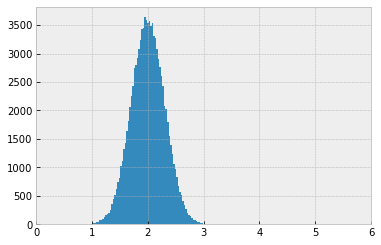

In [7]:
vals_g1 = stats.norm.rvs(loc = 2, scale=0.3, size = 100_000)
plt.hist(vals_g1, bins=100);
plt.xlim([0,6]);

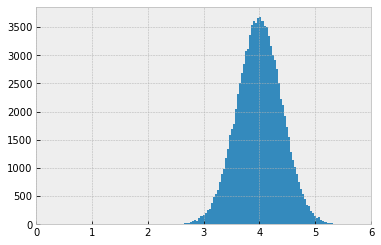

In [8]:
vals_g2 = stats.norm.rvs(loc = 4, scale=0.4, size = 100_000)
plt.hist(vals_g2, bins=100);
plt.xlim([0,6]);

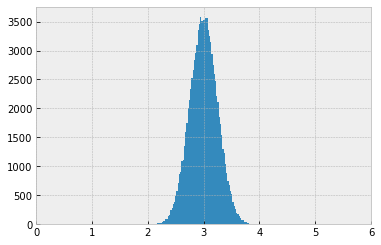

In [10]:
vals = (1/2)*(vals_g1 + vals_g2) # average of the two gaussian RVs

plt.hist(vals,bins=100);
plt.xlim([0,6]);

___

___

# <font color=blue>Z-Test</font>: Binary Hypothesis Tests involving Sample Mean *with Known and Equal Variances*

Suppose we have two populations characterized by RVs $X$ and $Y$, and the following samples $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$, where $x_i$ and $y_j$ are observed values of RVs $X$ and $Y$, which are assumed to have common variance $\sigma^2$.

* Let the averages of the data samples be

\begin{align*}
\bar{x} = \frac{1}{M}\sum_{i=1}^{M} x_i \text{, and } \bar{y} = \frac{1}{N}\sum_{j=1}^{N} y_j
\end{align*}

and denote the true means of the distributions $\mu_X$ and $\mu_Y$, respectively.

* Note that if the number of samples from each population is relatively large ($\geq 10$), then even if the original population does not have a Gaussian distribution, the averages will still be approximately Gaussian - Central Limit Theorem (CLT)

**If $\bar{x} \neq \bar{y}$, how can we conduct a binary hypothesis test on whether the two populations have different means?**

* What is the null hypothesis?

    * $H_0$: **the means are the same, $\mu_X = \mu_Y$**
    * $H_1$: **the means are not the same, $\mu_X \neq \mu_Y$**
    
* We will conduct this test only using the sample observations $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$

Under the null hypothesis, we compute the difference in the sample averages and determine the probability that a difference that large would be observed under the null hypothesis.

Thus, our test statistic is the difference in averages

\begin{align*}
t = \bar{x} - \bar{y}
\end{align*}

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from $X$ and $Y$ RVs, respectively. We can view $t$ as an instantiation of

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

If $\mu_X = \mu_Y = \mu$, then $E[\hat{\mu}_X] = E[\hat{\mu}_Y] = \mu$. Then, by linearity

\begin{align*}
\mu_T = E[T] = E[\hat{\mu}_X - \hat{\mu}_Y] = E[\hat{\mu}_X] - E[\hat{\mu}_Y] = \mu - \mu = 0
\end{align*}

* We can compute the variance of $T$ under the null hypothesis as:

\begin{align*}
\sigma_T^2 &= Var[T] \\
&= Var[\hat{\mu}_X - \hat{\mu}_Y] \\
&= Var[\hat{\mu}_X + (-\hat{\mu}_Y)] \\
&= Var[\hat{\mu}_X] + Var[-\hat{\mu}_Y] \\
&= Var[\hat{\mu}_X] + (-1)^2 Var[\hat{\mu}_Y] \\
&= \frac{\sigma^2}{M} + \frac{\sigma^2}{N} \\
& = \left( \frac{1}{M} + \frac{1}{N} \right) \sigma^2
\end{align*}

Finally, we can compute the probability of observing a difference in means as large as $t = \bar{x} - \bar{y}$. For convenience of discussion, assume $\bar{x} > \bar{y}$:

Let $t$ be the observed difference $\bar{x}-\bar{y} > 0$.

Hypothesis test:

* What is $P(\text{see result as extreme under }H_0)$

    * One-sided Hypothesis test: 
    
\begin{align*}
P(T \geq t | H_0) = Q\left(\frac{t-\mu_T}{\sigma_T}\right) = Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}
    
    * Two-sided Hypothesis test:
    
\begin{align*}
P(|T| \geq t | H_0) = 2 Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

**<font color=blue>Example 1</font> The city of Gainesville claims the mean commute time on SW 24th Ave from I-75 to UF is 23 minutes with a variance of 50. You traveled that route 10 times over the last two weeks and had an average commute time of 27 minutes. Conduct a hypothesis test to determine whether the City of Gainesville’s model is reasonable. Reject the null hypothesis if $p < 0.01$.**

1. What is the null hypothesis? Define the density under $H_0$.

<!-- Null Hypothesis: city's model is correct.

\begin{align*}
X_i \sim \text{Gaussian}(23, \sigma_X^2 = 50)
\end{align*} -->

2. Compute the sample mean, $\hat{\mu}$. Compute the bias and variance of the estimator $\hat{\mu}$.

<!-- \begin{align*}
\hat{\mu} = \frac{1}{10} \sum_{i=1}^{10} X_i\text{, (sample mean estimator)}
\end{align*}

\begin{align*}
E[\hat{\mu}] = 23 = \mu
\end{align*}

\begin{align*}
Var[\hat{\mu}] = \sigma^2_{\mu_X} = \frac{\sigma_X^2}{10} = \frac{50}{10} = 5
\end{align*} -->

3. What is the probability that observe a result this extreme, i.e., $P(\hat{\mu} \geq 27)$? Compute the one-sided and the two-sided hypothesis test probabilities.

<!-- One-sided hypothesis test:

\begin{align*}
P(\hat{\mu} \geq 27) = P\left(\frac{\hat{\mu} - 23}{\sigma_{\mu_X}} \geq \frac{27 - 23}{\sigma_{\mu_X}}\right) = P\left( Z \geq \frac{27-23}{\sqrt{5}} \right) = Q\left(\frac{27-23}{\sqrt{5}}\right) = Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*}

Two-sided hypothesis test:

\begin{align*}
P(|\hat{\mu}| \geq 27) = 2Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*} -->

In [11]:
def q(x):
    return stats.norm.sf(x)

In [14]:
t = 27 - 23 # observed difference of means statistic

# one-sided hypothesis test
q(t/np.sqrt(50/10))

0.03681913506015133

In [15]:
# two-sided hypothesis test
2*q(t/np.sqrt(50/10))

0.07363827012030266

**Conclusion:** 

We cannot reject the null hypothesis because p>0.01. The Gainesville's model cannot be rejected with the data we have.

___

# <font color=blue>T-Test</font>: Binary Hypothesis Tests with *Unknown Variance*

In many cases, the variance(s) of the underlying distributions are not known and must be estimated from the data.

In this case, the underlying distribution is even more spread out from the mean than the Gaussian distribution. More of the probability is in the tails.

The first step is to determine how to estimate the variance. Any ideas?

* Let's generate 10 samples from a Gaussian RV with mean 10 and variance 100. 
    * Compute the sample variance. 
    * Let's do this for 10,000 simulation steps, during each of which we redraw the 10 random samples and estimate the sample mean and variance. 
    * Using the average of the sample variance over the 10000 simulations as an estimator of the true variance, what do you observe?

In [17]:
num_sims=10_000
num_samples=10

sum_mux=0
sum_varx=0 # estimator 2
sum_varx_biased=0 # estimator 1

for sim in range(num_sims):
    # draw random samples from a G(10,100)
    x = stats.norm(loc=10,scale=10).rvs(size=num_samples)
    
    # compute the sample mean and add it to sum_mux
    mux = np.sum(x)/len(x) # sample average
    sum_mux += mux    # Expected value of mu_x_hat
    
    # compute the biased estimator of the variance and add it to sum_varx
    varx_biased = np.sum((x-mux)**2)/len(x)
    sum_varx_biased += varx_biased
    
    # compute the unbiased estimator of the variance and add it to sum_varx
    varx = np.sum((x-mux)**2)/(len(x)-1)
    sum_varx += varx
    
    
    
print('The expected value of the sample average is ~-=',  sum_mux/num_sims ) 
print('The expected value of unbiased variance (estimator 2) is ~=',  sum_varx/num_sims) 
print('The expected value of biased variance (estimator 1) is ~=',  sum_varx_biased/num_sims) 

The expected value of the sample average is ~-= 9.944441374812813
The expected value of unbiased variance (estimator 2) is ~= 99.97024722826265
The expected value of biased variance (estimator 1) is ~= 89.97322250543635


If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$ (degrees of freedom or dof).

* Let's compare the density function of a Normal RV with the Student's $t$ RV with different degrees of freedom.
     * Why does it behave this way?

In [18]:
norm = stats.norm() #G(0,1)

t1 = stats.t(1) # student's t-distribution with dof=1
t2 = stats.t(2) # student's t-distribution with dof=2
t5 = stats.t(5)
tnf = stats.t(100_000)

In [19]:
norm.stats('mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [20]:
t1.stats('mvsk')

(array(inf), array(nan), array(nan), array(nan))

In [21]:
t2.stats('mvsk')

(array(0.), array(inf), array(nan), array(nan))

In [22]:
t5.stats('mvsk')

(array(0.), array(1.66666667), array(0.), array(6.))

In [23]:
tnf.stats('mvsk')

(array(0.), array(1.00002), array(0.), array(6.00024001e-05))

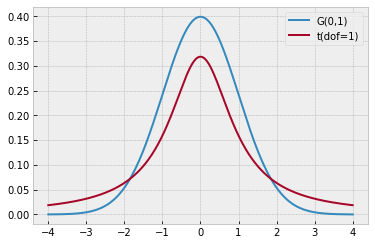

In [24]:
x = np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='G(0,1)')
plt.plot(x, t1.pdf(x),label='t(dof=1)')
plt.legend();

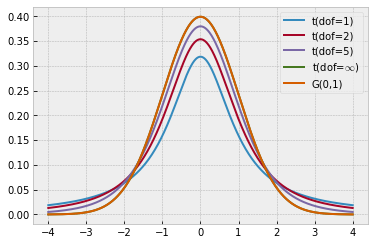

In [26]:
x = np.linspace(-4,4,1000)
plt.plot(x, t1.pdf(x),label='t(dof=1)')
plt.plot(x, t2.pdf(x),label='t(dof=2)')
plt.plot(x, t5.pdf(x),label='t(dof=5)')
plt.plot(x, tnf.pdf(x),label='t(dof=$\infty$)')
plt.plot(x,norm.pdf(x),label='G(0,1)')
plt.legend();

**<font color=blue>Example 1</font> Analytical Test on Difference of Means (T-Test)**

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

In [30]:
df = pd.read_csv('firearms-urban.csv')
df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [31]:
# Use the STATE column as the index

df = df.set_index('STATE')
df

,RATE-2014,Percent Urban
STATE,,
AL,16.9,59.0
AK,19.2,66.0
AZ,13.5,89.8
AR,16.6,56.2
CA,7.4,95.0
CO,12.2,86.2
CT,5.0,88.0
DE,11.1,83.3
FL,11.5,91.2


In [32]:
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

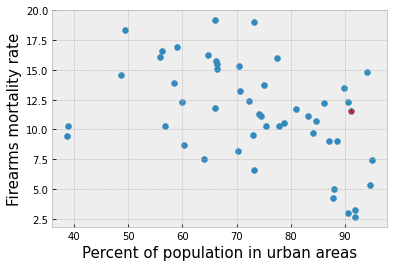

In [33]:
# Plot the data
# Highlight the point for Florida

plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'],marker='*',c='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [35]:
df['RATE-2014'][df['Percent Urban']<80].shape # rural

(32,)

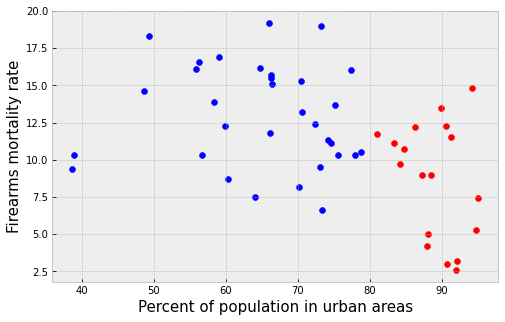

In [37]:
# Let's consider:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

plt.figure(figsize=(8,5))

plt.scatter(df['Percent Urban'][df['Percent Urban']<80].to_numpy(),df['RATE-2014'][df['Percent Urban']<80],c='b')
plt.scatter(df['Percent Urban'][df['Percent Urban']>=80].to_numpy(),df['RATE-2014'][df['Percent Urban']>=80],c='r')

plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [41]:
# Let's the firearm mortality rate for 2014 where:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

# Extract data
urban = df['RATE-2014'][df['Percent Urban']>=80].to_numpy()
rural = df['RATE-2014'][df['Percent Urban']<80].to_numpy()

# Estimate Density using KDE
f_urban = stats.gaussian_kde(urban) # Kernel Density Estimation with Gaussian kernel
f_rural = stats.gaussian_kde(rural)


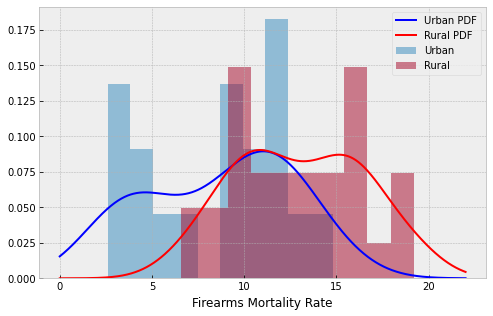

In [42]:
plt.figure(figsize=(8,5))
x = np.linspace(0,22,1000)

plt.hist(urban,alpha = 0.5, label = 'Urban', density = True)
plt.hist(rural,alpha = 0.5, label = 'Rural', density = True)
plt.plot(x,f_urban.pdf(x), 'b', label = 'Urban PDF')
plt.plot(x,f_rural.pdf(x), 'r', label = 'Rural PDF')

plt.legend()
plt.xlabel('Firearms Mortality Rate');

In [43]:
# sample mean for each sample

urban.mean(), rural.mean()

(8.677777777777777, 12.99375)

In [45]:
diff = rural.mean() - urban.mean()
diff

4.315972222222223

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [46]:
pooled = df['RATE-2014']

pooled_mean = pooled.mean()
pooled_mean

11.440000000000003

In [47]:
pooled

STATE
AL    16.9
AK    19.2
AZ    13.5
AR    16.6
CA     7.4
CO    12.2
CT     5.0
DE    11.1
FL    11.5
GA    13.7
HI     2.6
ID    13.2
IL     9.0
IN    12.4
IA     7.5
KS    11.3
KY    13.9
LA    19.0
ME     9.4
MD     9.0
MA     3.2
MI    11.1
MN     6.6
MS    18.3
MO    15.3
MT    16.1
NE     9.5
NV    14.8
NH     8.7
NJ     5.3
NM    16.0
NY     4.2
NC    11.8
ND    12.3
OH    10.3
OK    15.7
OR    11.7
PA    10.5
RI     3.0
SC    15.5
SD    10.3
TN    15.1
TX    10.7
UT    12.3
VT    10.3
VA    10.3
WA     9.7
WV    14.6
WI     8.2
WY    16.2
Name: RATE-2014, dtype: float64

In [49]:
# Sample unbiased estimator for the variance
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)


17.220408163265304

In [50]:
# Alternative
pooled_var = np.var(pooled,ddof=1) # ddof = delta degrees of freedom

pooled_var


17.22040816326531

In [51]:
# We need to calculate the variance of the difference of sample mean estimators
sm_var = pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [52]:
# Last parameter of T: degrees of freedom
N = len(urban)+len(rural)-1
dof = N -1
dof


48

Calculate the t-distribution and perform the test

In [53]:
myt = stats.t(dof, scale=np.sqrt(sm_var))


# We set the variance of the T random variable here

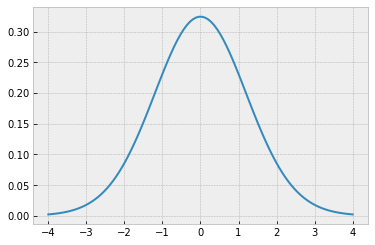

In [55]:
t=np.linspace(-4,4,100)
plt.plot(t,myt.pdf(t));

In [56]:
# 1-sided test

myt.sf(diff)


0.000463991896118919

In [57]:
# 2-sided test

2*myt.sf(diff)


0.000927983792237838

In [58]:
# other 1-sided

myt.cdf(-diff)


0.000463991896118919

**Conclusion:** 

The p-value is much smaller than $\alpha=0.01$, therefore we REJECT the null hypothesis that the means of the populations for urban firearms mortality rate and rural firearms mortality rate are the same.

___

**<font color=blue>Example 2</font>** Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.

<!-- The 95% confidence interval is the interval $[a,b]$ for which $P(T \le a) =0.025$ and $P(T\ge b) = 0.025$

Thus
$P(T \le a) = F_T(a) =0.025$, which is satisfied if $a = F_{T}^{-1}(0.025)$

Similarly,
$P(T \leq b) = 0.975$ and $P(T \ge b) = 1 - F_T(b) +P(T=b) =1- F_T(b) =0.025$, which is satisfied if 
$b= F_{T}^{-1}(0.975)$

Thus, the 95% confidence interval is: -->

**Conclusion:**

<!-- Since the 95% confidence interval does not contain the observed mean difference, we say it is not compatible with the assumption that this data comes from the same distribution (in particular, it is incompatible with even the means of the distributions being equal). Therefore this is a statistically significant event, therefore we reject the null hypothesis. -->